#### Exemplo de Curva ROC

No-Skill Prediction: AUROC = 0.500
Random Forest: AUROC = 0.958
LogisticRegression: AUROC = 0.935


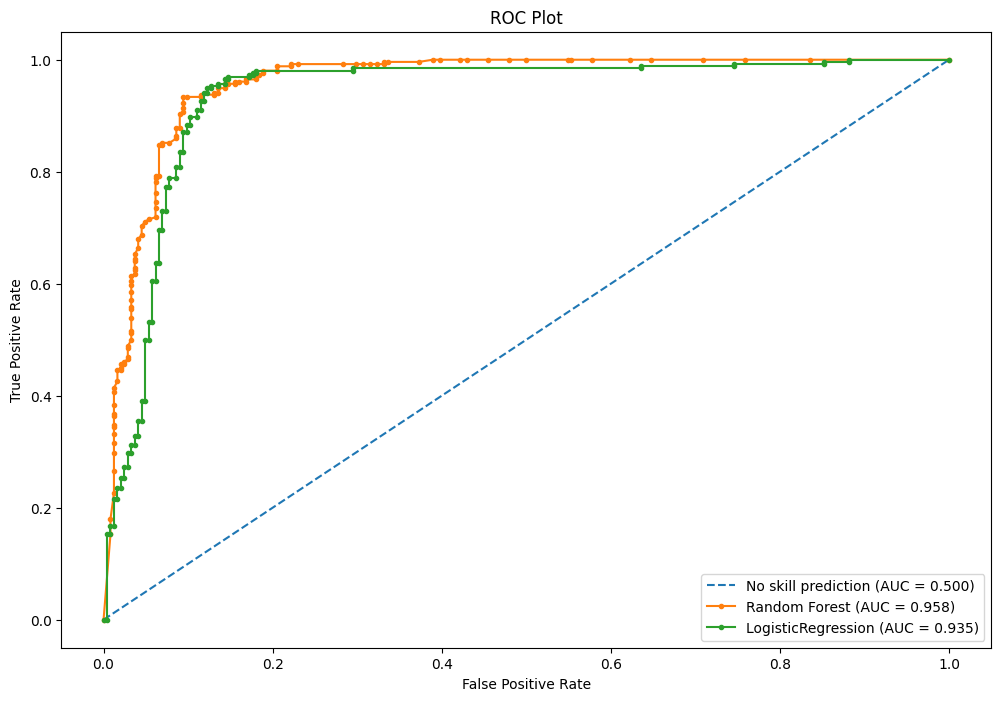

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=8)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=8)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_features=5, n_estimators=500)
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

ns_probs = [0 for _ in range(len(y_test))]

rf_probs = rf_model.predict_proba(X_test)

lr_probs = lr_model.predict_proba(X_test)

lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No-Skill Prediction: AUROC = %.3f' % (ns_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('LogisticRegression: AUROC = %.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No skill prediction (AUC = %0.3f)' % ns_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression (AUC = %0.3f)' % lr_auc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()